<a href="https://colab.research.google.com/github/sivaprawin/Machine-learning-projects/blob/main/vary_GApopulation_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, VGG19, InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess_input
from tensorflow.keras.applications.vgg19 import preprocess_input as vgg_preprocess_input
from tensorflow.keras.applications.inception_v3 import preprocess_input as inception_preprocess_input
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, VGG19, InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess_input
from tensorflow.keras.applications.vgg19 import preprocess_input as vgg_preprocess_input
from tensorflow.keras.applications.inception_v3 import preprocess_input as inception_preprocess_input

# Define the path to your mounted drive containing "healthy" and "patient" folders
data_dir = 'D:/vs mini/dataset2'

# Define a directory to save the preprocessed images in Colab's file system
preprocessed_images_dir = 'D:/vs mini/preprocessed_images'
os.makedirs(preprocessed_images_dir, exist_ok=True)

# Create an ImageDataGenerator for data preprocessing
datagen = ImageDataGenerator(
    rescale=1.0 / 256,  # Scale pixel values to be in the range [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generate and save batches of preprocessed images
batch_size = 32
target_size = (256, 256)  # Resize images to 256x256 pixels

generator = datagen.flow_from_directory(
    data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary',  # Use 'categorical' for multi-class classification
    save_to_dir=preprocessed_images_dir,  # Specify the directory to save the preprocessed images
    save_format='jpeg'  # Format for saved images
)

# Generate and save the preprocessed images with labels
for _ in range(len(generator)):
    batch_images, batch_labels = next(generator)
    for i, label in enumerate(batch_labels):
        if label == 0:
            category_folder = 'healthy'
        else:
            category_folder = 'patient'
        image_filename = f'preprocessed_{i}.jpeg'
        image_path = os.path.join(preprocessed_images_dir, category_folder, image_filename)
        os.makedirs(os.path.join(preprocessed_images_dir, category_folder), exist_ok=True)
        tf.keras.preprocessing.image.save_img(image_path, batch_images[i])


In [ ]:
# Define paths to your image folders
healthy_dir = 'D:/vs mini/preprocessed_images/healthy'
patient_dir = 'D:/vs mini/preprocessed_images/patient'

In [ ]:
# Cell 2: Initialize lists to store features and labels
all_features = []
labels = []

# Load pre-trained models
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Define a function to extract features using a given model and preprocess input
def extract_features(model, preprocess_input, img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = model.predict(img_array)
    return features.flatten()  # Flatten the features

# Load, preprocess, and extract features from healthy images
for filename in os.listdir(healthy_dir):
    img_path = os.path.join(healthy_dir, filename)
    resnet_features = extract_features(resnet_model, resnet_preprocess_input, img_path)
    vgg_features = extract_features(vgg_model, vgg_preprocess_input, img_path)
    inception_features = extract_features(inception_model, inception_preprocess_input, img_path)
    combined_features = np.concatenate((resnet_features, vgg_features, inception_features))
    all_features.append(combined_features)
    labels.append(0)  # Label 0 for healthy

# Load, preprocess, and extract features from patient images
for filename in os.listdir(patient_dir):
    img_path = os.path.join(patient_dir, filename)
    resnet_features = extract_features(resnet_model, resnet_preprocess_input, img_path)
    vgg_features = extract_features(vgg_model, vgg_preprocess_input, img_path)
    inception_features = extract_features(inception_model, inception_preprocess_input, img_path)
    combined_features = np.concatenate((resnet_features, vgg_features, inception_features))
    all_features.append(combined_features)
    labels.append(1)  # Label 1 for patient

# Convert lists to numpy arrays
X = np.array(all_features)
y = np.array(labels)


In [ ]:

from sklearn.model_selection import train_test_split
random_seed=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
accuracy = knn.score(X_test, y_test)
accuracy



In [ ]:
population_size = 20  # Adjust the population size to ensure it's at least as large as selection_size


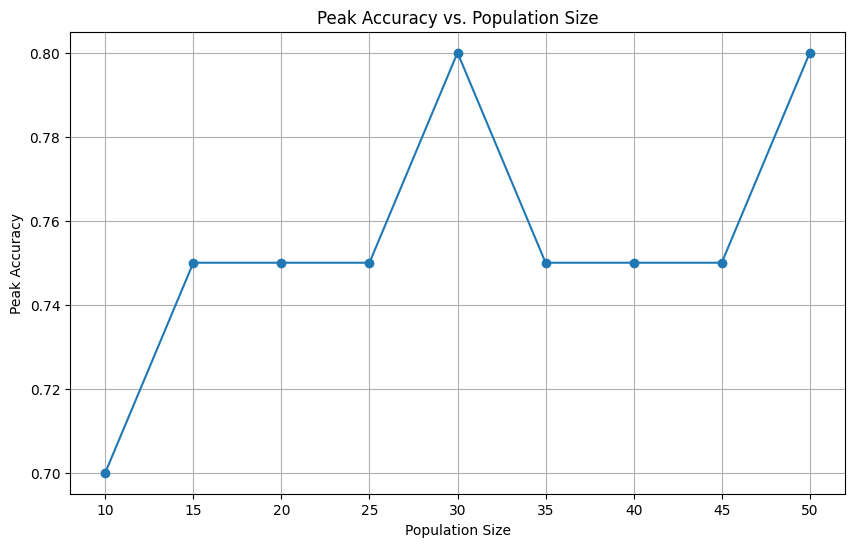

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Genetic Algorithm Parameters
population_sizes = list(range(10, 51, 5))
total_iterations = 200
crossover_rate = 0.7
mutation_rate = 0.3
selection_size = 20
random_seed = 13

# Create an initial population of binary feature vectors
def initialize_population(population_size, feature_count):
    population = np.random.randint(2, size=(population_size, feature_count))
    return population

# Calculate fitness (accuracy) for each feature vector
def calculate_fitness(population, X, y):
    fitness_scores = []
    for i in range(population.shape[0]):
        selected_features = population[i, :]
        # Use the selected features to create a subset of X
        subset_X = X[:, selected_features == 1]
        # Split the data into training and testing sets (you can adjust this as needed)
        X_train, X_test, y_train, y_test = train_test_split(subset_X, y, test_size=0.3, random_state=random_seed)
        # Train and evaluate KNN (you can choose a different ML algorithm if needed)
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        fitness_scores.append(accuracy)
    return np.array(fitness_scores)

# Genetic Algorithm
def genetic_algorithm(X, y, population_size):
    feature_count = X.shape[1]
    population = initialize_population(population_size, feature_count)
    
    for iteration in range(total_iterations):
        # Calculate fitness scores for the current population
        fitness_scores = calculate_fitness(population, X, y)
        
        # Select the top candidates
        top_indices = np.argsort(fitness_scores)[-min(selection_size, population_size):]
        top_population = population[top_indices, :]
        
        # Create a new population through crossover and mutation
        new_population = []
        while len(new_population) < population_size:
            # Crossover
            parent1 = top_population[np.random.randint(len(top_population))]
            parent2 = top_population[np.random.randint(len(top_population))]
            crossover_mask = (np.random.rand(feature_count) < crossover_rate).astype(int)
            child = (parent1 * crossover_mask) + (parent2 * (1 - crossover_mask))
            
            # Mutation
            mutation_mask = (np.random.rand(feature_count) < mutation_rate).astype(int)
            child = (child + mutation_mask) % 2
            
            new_population.append(child)
        
        # Update the population
        population = np.array(new_population)
    
    # Find the best candidate
    final_fitness_scores = calculate_fitness(population, X, y)
    best_accuracy = np.max(final_fitness_scores)
    best_vector = population[np.argmax(final_fitness_scores)]
    
    return best_accuracy, best_vector

# Perform the analysis for varying population sizes
peak_accuracies = []
best_feature_vectors = []  # Store the best feature vectors
for population_size in population_sizes:
    best_accuracy, best_vector = genetic_algorithm(X, y, population_size)
    peak_accuracies.append(best_accuracy)
    best_feature_vectors.append(best_vector)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(population_sizes, peak_accuracies, marker='o', linestyle='-')
plt.title("Peak Accuracy vs. Population Size")
plt.xlabel("Population Size")
plt.ylabel("Peak Accuracy")
plt.grid(True)
plt.show()

# Now 'best_feature_vectors' contains the best binary vectors for each population size


In [ ]:
# Multiply the optimized binary feature vector with the input feature vector
optimized_feature_map = X[:, best_vector == 1]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Split the data into a train set (80%) and a test set (20%)
X_train, X_test, y_train, y_test = train_test_split(optimized_feature_map, y, test_size=0.2, random_state=random_seed)

# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict the labels on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.8461538461538461
Confusion Matrix:
[[7 2]
 [0 4]]


In [ ]:
# Select relevant features based on the best binary vector
selected_train_features = X_train[:, best_vector == 1]
selected_test_features = X_test[:, best_vector == 1]